<a href="https://colab.research.google.com/github/geabd1/COSC251/blob/main/hw4_abdalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bank.csv')
housing = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Housing.csv')

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
Y = housing['price']
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingstatus']]

print("Independent variables (X):")
print(X.head())
print("\nDependent variable (Y):")
print(Y.head())

Independent variables (X):
   area  bedrooms  bathrooms  stories furnishingstatus
0  7420         4          2        3        furnished
1  8960         4          4        4        furnished
2  9960         3          2        2   semi-furnished
3  7500         4          2        2        furnished
4  7420         4          1        2        furnished

Dependent variable (Y):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


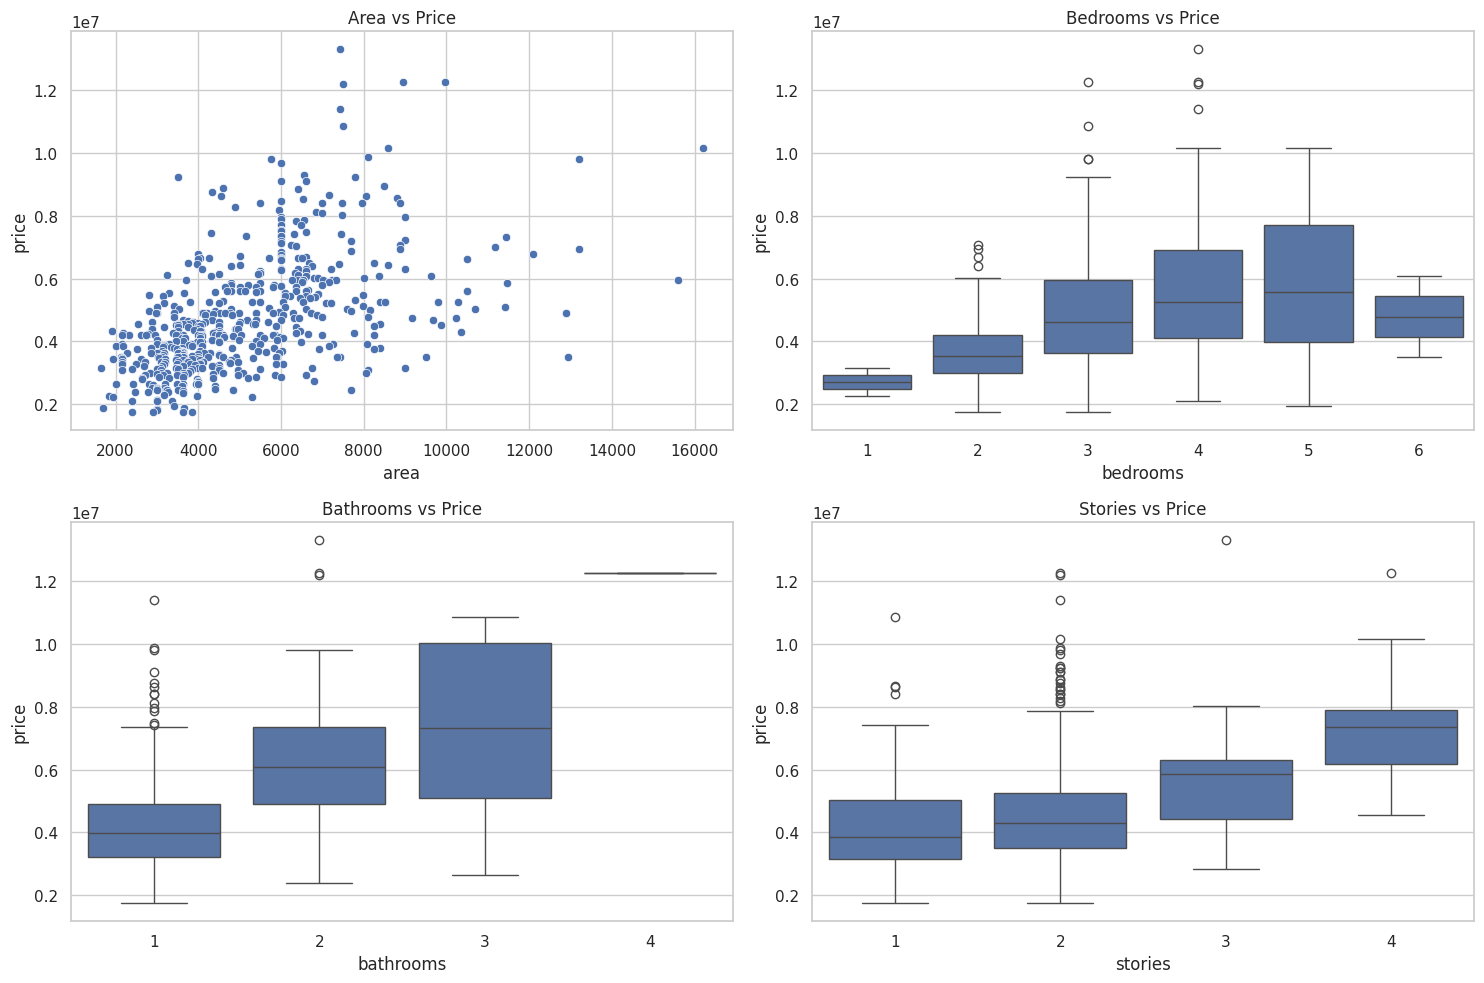

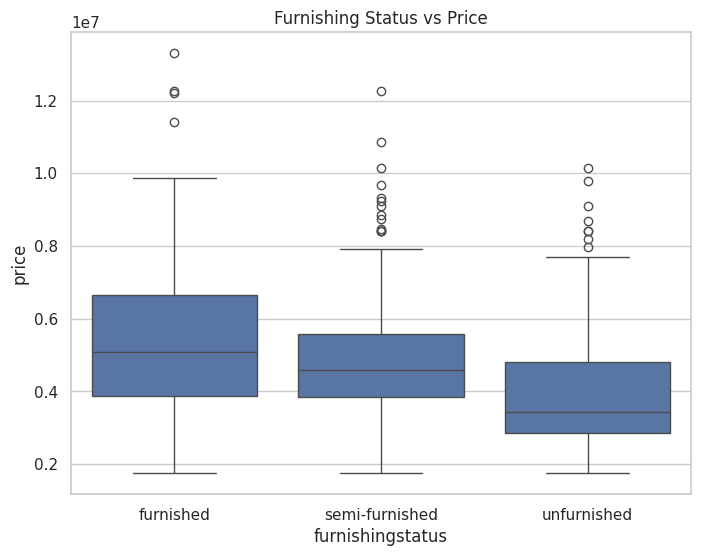

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], x='area', y='price', data=housing)
axes[0, 0].set_title('Area vs Price')

sns.boxplot(ax=axes[0, 1], x='bedrooms', y='price', data=housing)
axes[0, 1].set_title('Bedrooms vs Price')

sns.boxplot(ax=axes[1, 0], x='bathrooms', y='price', data=housing)
axes[1, 0].set_title('Bathrooms vs Price')
sns.boxplot(ax=axes[1, 1], x='stories', y='price', data=housing)
axes[1, 1].set_title('Stories vs Price')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='furnishingstatus', y='price', data=housing)
plt.title('Furnishing Status vs Price')
plt.show()

In [ ]:
X_encoded = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

print("Training set shapes:")
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print("\nTest set shapes:")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training set shapes:
X_train: (436, 6), Y_train: (436,)

Test set shapes:
X_test: (109, 6), Y_test: (109,)


In [ ]:

model = LinearRegression()

model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [ 3.34220860e+02  1.63862309e+05  1.21324897e+06  4.50549179e+05
 -3.18084765e+05 -7.71034686e+05]
Model intercept: 539545.0628662547


In [ ]:
sample_house = np.array([4850, 3, 3, 2, 0, 1]).reshape(1, -1)

predicted_price = model.predict(sample_house)

print(f"Predicted price for the house: {predicted_price[0]:.2f}")

Predicted price for the house: 6421913.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


First 10 test samples comparison:
     Actual Price  Predicted Price
316       4060000     5.723459e+06
77        6650000     6.981713e+06
360       3710000     3.563235e+06
90        6440000     4.498499e+06
493       2800000     4.018445e+06
209       4900000     4.169860e+06
176       5250000     5.542492e+06
249       4543000     6.190353e+06
516       2450000     2.842909e+06
426       3353000     3.597326e+06


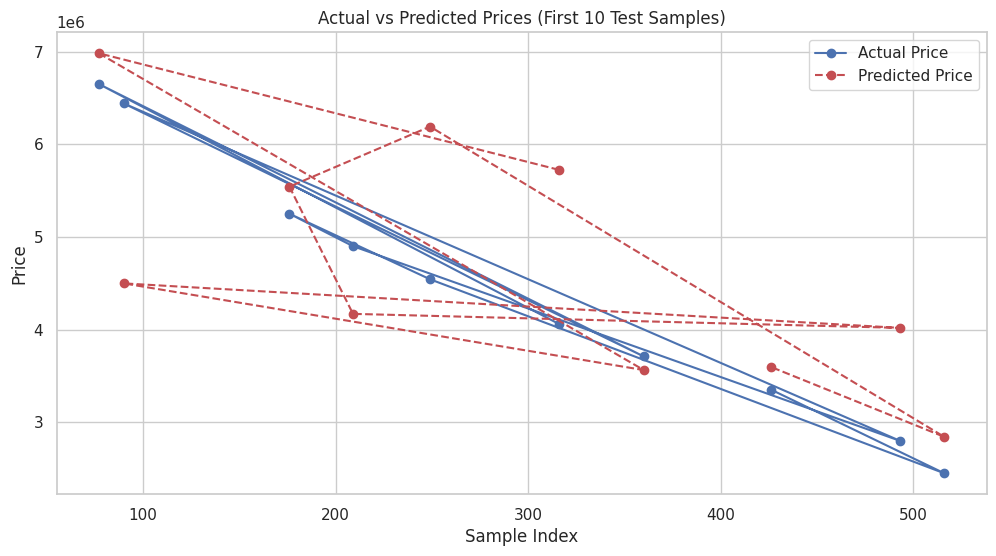

In [ ]:
Y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual Price': Y_test, 'Predicted Price': Y_pred})

print("First 10 test samples comparison:")
print(comparison_df.head(10))

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index[:10], comparison_df['Actual Price'][:10], 'bo-', label='Actual Price')
plt.plot(comparison_df.index[:10], comparison_df['Predicted Price'][:10], 'ro--', label='Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (First 10 Test Samples)')
plt.legend()
plt.show()

In [ ]:
r2 = r2_score(Y_test, Y_pred)

mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)

print(f"R Squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R Squared: 0.5302
Mean Squared Error: 2374560756690.51
Root Mean Squared Error: 1540960.98


**QUESTION 2**

In [ ]:
print("DataFrame Summary:")
print(bank_data.info())
print("\nFirst 5 rows:")
print(bank_data.head())
print("\nDescriptive Statistics:")
print(bank_data.describe())

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

First 5 rows:
   ID  Age  Exper

In [ ]:
X = bank_data[['Age', 'Experience', 'Income', 'Education']]
y = bank_data['Personal Loan']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Test Set Evaluation:
Accuracy: 0.9500
F1 Score: 0.7126
Confusion Matrix:
[[888   7]
 [ 43  62]]


In [ ]:
cv_scores = cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy')

print("\n5-Fold Cross Validation Results:")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print("Individual Fold Scores:", cv_scores)


5-Fold Cross Validation Results:
Mean Accuracy: 0.9416
Standard Deviation: 0.0065
Individual Fold Scores: [0.949 0.931 0.948 0.94  0.94 ]


In [ ]:
new_data = pd.DataFrame({
    'Age': [35, 45, 28, 50, 40],
    'Experience': [10, 20, 5, 25, 15],
    'Income': [60, 120, 40, 200, 90],
    'Education': [1, 3, 2, 3, 2]
})

new_data_scaled = scaler.transform(new_data)

new_predictions = logreg.predict(new_data_scaled)

print("\nPredictions for New Data Points:")
for i, (data, pred) in enumerate(zip(new_data.values, new_predictions)):
    print(f"Data Point {i+1}: Age={data[0]}, Experience={data[1]}, Income={data[2]}, Education={data[3]} => {'Accept Loan' if pred == 1 else 'Reject Loan'}")


Predictions for New Data Points:
Data Point 1: Age=35, Experience=10, Income=60, Education=1 => Reject Loan
Data Point 2: Age=45, Experience=20, Income=120, Education=3 => Accept Loan
Data Point 3: Age=28, Experience=5, Income=40, Education=2 => Reject Loan
Data Point 4: Age=50, Experience=25, Income=200, Education=3 => Accept Loan
Data Point 5: Age=40, Experience=15, Income=90, Education=2 => Reject Loan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
